In [ ]:
#Kết nối với drive cá nhân
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.5 MB 8.3 MB/s 
     |████████████████████████████████| 965 kB 58.2 MB/s 


In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 9.6 MB/s 


In [ ]:
import re

In [ ]:
import pandas as pd
data = pd.read_excel("/content/gdrive/MyDrive/Luan_van/BiLSTM/data_crawl_final.xlsx", index_col=False)

In [ ]:
data_Sentiment = data['Sentiment']
data_Sentiment = data_Sentiment.astype(int)
data['Sentiment'] = data_Sentiment
data

,Text,Sentiment
0,"Đã bị nhiễm rồi, mà cũng bắt chích cho bằng được",0
1,thực sự thì tiêm xong yếu hẳn,1
2,Bắt buộc tiêm để được đi làm chứ tiêm xong yếu...,1
3,"Tiêm xong lắm bệnh vl, hụt hơi, mề đay, nóng gan",1
4,"Tiêm 2 mũi xong thấy giảm trí nhớ, tim đập nha...",1
...,...,...
7995,mấy bạn đừng kén chọn nữa em tiêm vacxin tàu x...,2
7996,Mình tiêm verocell đây. Phòng trọ 6 đứa thì 5 ...,2
7997,Mong được tiêm mà không được. Giờ có vaccine g...,2
7998,So ra thì mấy loại vaccine sản xuất từ mấy nướ...,2


In [ ]:
def standardize_data(row):
    # Xóa dấu chấm, phẩy, hỏi ở cuối câu
    row = re.sub(r"[\.,\?]+$-", "", row)
    # Xóa tất cả dấu trong câu
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ") \
        .replace("("," ").replace(")"," ") \
        .replace("%"," ").replace("+"," ") \
        .replace("="," ")
    row = row.strip()
    return row.lower()
# Pre-process function
def preprocess(text):
    text = text.split(" ")
    for i in range(len(text)):
      text[i]=unidecode(text[i])
      text[i] = text[i].lower()
    return text

In [ ]:
from sklearn.model_selection import train_test_split 
train, test= train_test_split(data, test_size=0.3, random_state=42)

O_X = train['Text']
O_y = train['Sentiment']
X_test1 = test['Text']
y_test1 = test['Sentiment']

In [ ]:
X_test = X_test1.apply(standardize_data)
train_set = O_X.apply(standardize_data)
target_set = O_y

Epoch 1/20
350/350 [==============================] - 9s 19ms/step - loss: 0.5682 - accuracy: 0.5186
Epoch 2/20
350/350 [==============================] - 6s 19ms/step - loss: 0.4748 - accuracy: 0.6584
Epoch 3/20
350/350 [==============================] - 7s 19ms/step - loss: 0.4209 - accuracy: 0.7164
Epoch 4/20
350/350 [==============================] - 7s 20ms/step - loss: 0.3762 - accuracy: 0.7546
Epoch 5/20
350/350 [==============================] - 6s 18ms/step - loss: 0.3370 - accuracy: 0.7814
Epoch 6/20
350/350 [==============================] - 6s 18ms/step - loss: 0.2949 - accuracy: 0.8232
Epoch 7/20
350/350 [==============================] - 6s 18ms/step - loss: 0.2593 - accuracy: 0.8439
Epoch 8/20
350/350 [==============================] - 6s 18ms/step - loss: 0.2197 - accuracy: 0.8718
Epoch 9/20
350/350 [==============================] - 6s 18ms/step - loss: 0.1883 - accuracy: 0.8889
Epoch 10/20
350/350 [==============================] - 6s 18ms/step - loss: 0.1643 - accura

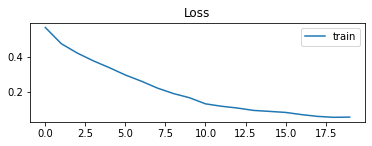

In [ ]:
# Bi LSTM 

import numpy as np
import pandas as pd
from keras.layers import Dense, Input, Bidirectional, GRU, Reshape, Conv2D, MaxPool2D, Concatenate, Flatten, Dropout, \
    GlobalMaxPool1D, LSTM
from keras.layers import Embedding
from keras.preprocessing import text, sequence
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.models import Model
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,accuracy_score
from matplotlib import pyplot
from pyvi.ViTokenizer import ViTokenizer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from unidecode import unidecode
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split 



EMBEDDING_FILE = '/content/gdrive/MyDrive/Luan_van/BiLSTM/cc.vi.300.vec'
MODEL_FILE = '/content/gdrive/MyDrive/Luan_van/BiLSTM/BiLSTM_model_ccSC.h5'
DATA = '/content/gdrive/MyDrive/Luan_van/BiLSTM/data_crawl_final.xlsx'


max_features = 11221
maxlen = 200
embed_size = 300
batch_size = 16
epochs = 20

# read data

train, test= train_test_split(data, test_size=0.3, random_state=42)

O_X = train['Text']
O_y = train['Sentiment']

train_set = O_X
target_set = O_y

# --------------TRICH XUAT DAC TRUNG -------------------------
# Vectorize text + Prepare GloVe Embedding
tokenizer = text.Tokenizer(num_words=None, lower=True, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(train_set.astype(str))


# --------------END TRICH XUAT DAC TRUNG -------------------------

embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embed_size))
max_features = num_words

for word, i in word_index.items():
    if i >= max_features:
        continue

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# ------------------- XAY DUNG MO HINH MANG NEURAL -----------------------
inp = Input(shape=(maxlen, ))
x = Embedding(max_features, embed_size)(inp)
x = Bidirectional(LSTM(50, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(3, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# ------------------- END XAY DUNG MO HINH MANG NEURAL -----------------------

# Kfold cross validation
results = []
confuses = []
kfold = StratifiedShuffleSplit(n_splits=5, test_size=0.2)

count = 1
X_test1 = test['Text']
y_test1 = test['Sentiment']
X = train_set
y = target_set

acc = 0
X_train_fold = [preprocess(str(p)) for p in list(X)]
X_train_fold = tokenizer.texts_to_sequences(X_train_fold)
X_train_fold = sequence.pad_sequences(X_train_fold, maxlen=maxlen)

X_test_fold = [preprocess(str(p)) for p in list(X_test1)]
X_test_fold = tokenizer.texts_to_sequences(X_test_fold)
X_test_fold = sequence.pad_sequences(X_test_fold, maxlen=maxlen)

y_train_fold = to_categorical(y, num_classes=3)
y_test_fold = y_test1

history = model.fit(X_train_fold, y_train_fold, batch_size=batch_size, epochs=epochs, verbose=1)
prediction = model.predict(X_test_fold, batch_size=batch_size, verbose=1)
test_pred = prediction.argmax(axis=-1)
evaluate = f1_score(y_test_fold, test_pred, average='macro')
confuse = confusion_matrix(y_test_fold, test_pred, labels=[0, 1, 2])
accuracy = accuracy_score(y_test_fold, test_pred)
print('===============================================')
print("FOLD {}: {}".format(count, evaluate))
print(confuse)
results.append(evaluate)
confuses.append(confuse)
print('===============================================')

if evaluate > acc:
    model.save('/content/gdrive/MyDrive/Luan_van/BiLSTM/BiLSTM_model_ccSC.h5')
    acc = evaluate


print(" acc: {}".format(str(accuracy)))
print(" f1: {}".format(str(evaluate)))
print(" conf mat: {}".format(np.mean(confuses, axis=-3)))


print(classification_report(y_test_fold, test_pred))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')

pyplot.legend()

pyplot.show()

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       776
           1       0.83      0.80      0.81       834
           2       0.81      0.86      0.83       790

    accuracy                           0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400



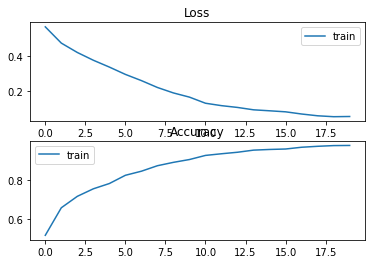

In [ ]:
print(classification_report(y_test_fold, test_pred))
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
#pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# vẽ đồ thị thể hiện độ chính xác trong quá trình huấn luyện
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
#pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

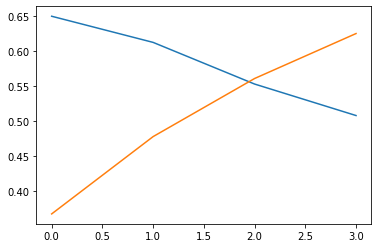

In [ ]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['accuracy'])